In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson,tplquad,nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Laura Camila Rios Quintero

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda w: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [ ]:
# Aqui va su código

funcion = lambda w,z,y,x: x+y+z+w



from scipy.integrate import quad




def integral_w(z, y, x):
    return quad(funcion, z**2, z+3, args=(z, y, x))[0]


def integral_z(y, x):
    return quad(integral_w, y**2, y+2, args=(y, x))[0]

def integral_y(x):
    return quad(integral_z, x**2, x+1, args=(x,))[0]


resultado = quad(integral_y, 0, 1)[0]

print(f"Resultado numérico: {resultado}")




Resultado numérico: -0.6500971589021813


In [ ]:
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits =  [0, 1]

resultado_exacto = nquad(funcion,[w_limits,z_limits,y_limits,x_limits])

#Error
error = abs(resultado-resultado_exacto[0])

print(error)


0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [14]:

# Integral K(k)

def K(k_cuadrado):

    integrando_K = lambda x: 1/np.sqrt(1-(k_cuadrado*np.sin(x)**2))
    return quad(integrando_K,0,np.pi/2)[0]

#Integral E(k)
def E(k_cuadrado):

    integrando_E = lambda x: np.sqrt(1- (k_cuadrado*np.sin(x)**2))
    return quad(integrando_E,0,np.pi/2)[0]


def A(r,x,a=1,I=3):
    k = (4*r*np.sin(x))/(1+ r**2 + 2*r*np.sin(x))

    #Metiendo k en E y K

    valor_K = K(k)
    valor_E = E(k)

    expresion_A = (4*I*a / np.sqrt(a**2 + r**2 +2*a*r*np.sin(x)))*(((2-k)*valor_K - 2*valor_E)/k)
    return expresion_A


<ipython-input-14-023701d45cfd>:23: RuntimeWarning: invalid value encountered in scalar divide
  expresion_A = (4*I*a / np.sqrt(a**2 + r**2 +2*a*r*np.sin(x)))*(((2-k)*valor_K - 2*valor_E)/k)


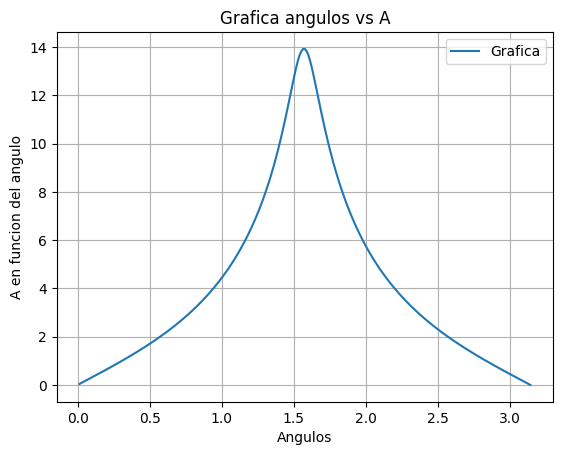

In [16]:
# a
# Grafica

valores_x= np.linspace(0,np.pi,250)

valores_A = []
for i in valores_x:
    valores_A.append(A(1.1,i))


plt.plot(valores_x, valores_A, label = 'Grafica')
plt.xlabel('Ángulos')
plt.ylabel('A en función del ángulo')
plt.title('Grafica ángulos vs A')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-14-023701d45cfd>:23: RuntimeWarning: invalid value encountered in scalar divide
  expresion_A = (4*I*a / np.sqrt(a**2 + r**2 +2*a*r*np.sin(x)))*(((2-k)*valor_K - 2*valor_E)/k)


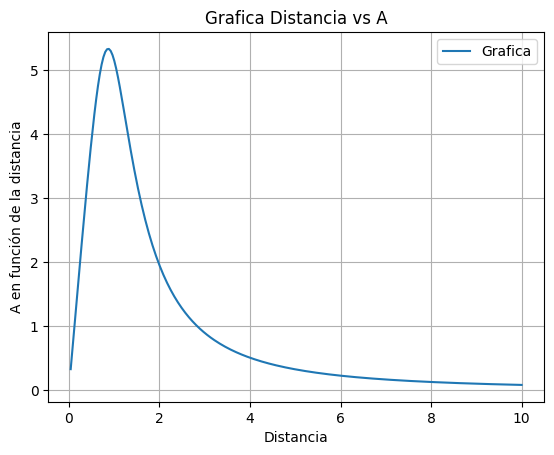

In [17]:
#b
valores_r = np.linspace(0,10,250)

valores_A2 = []
for i in valores_r:
    valores_A2.append(A(i,np.pi/3))


plt.plot(valores_r, valores_A2, label = 'Grafica')
plt.xlabel('Distancia')
plt.ylabel('A en función de la distancia')
plt.title('Grafica Distancia vs A')
plt.legend()
plt.grid(True)
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [ ]:
# Aqui va su código



#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [21]:
# Matriz random 5x5

A = np.random.randint(-10, 10, (5, 5))  # Enteros entre -10 y 10
print(A)

det_A = np.linalg.det(A)    # determinante de A

Valores_propios = np.linalg.eigvals(A)

producto = np.prod(Valores_propios)  # Productos de los valores propios



print(f'determinante de A: {det_A}, producto de valores poropios: {producto}')

[[  0  -8 -10   9   1]
 [ -7   9  -3  -8  -9]
 [ -4   6  -6   1   9]
 [  3  -3   2 -10  -8]
 [  9  -2  -6 -10   0]]
determinante de A: 127092.00000000007, producto de valores poropios: (127092.00000000017-0j)
